In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

df = pd.read_csv('NETWORK18.NS.csv')


In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

time = np.arange(1, len(df) + 1).reshape(-1, 1)  
stock_prices = df['Close'].values

if np.isnan(stock_prices).any():
    valid_indices = ~np.isnan(stock_prices)
    time = time[valid_indices]
    stock_prices = stock_prices[valid_indices]


Linear Regression MSE: 16074.41232729407
Polynomial Regression (Degree 2) MSE: 15989.409173829576


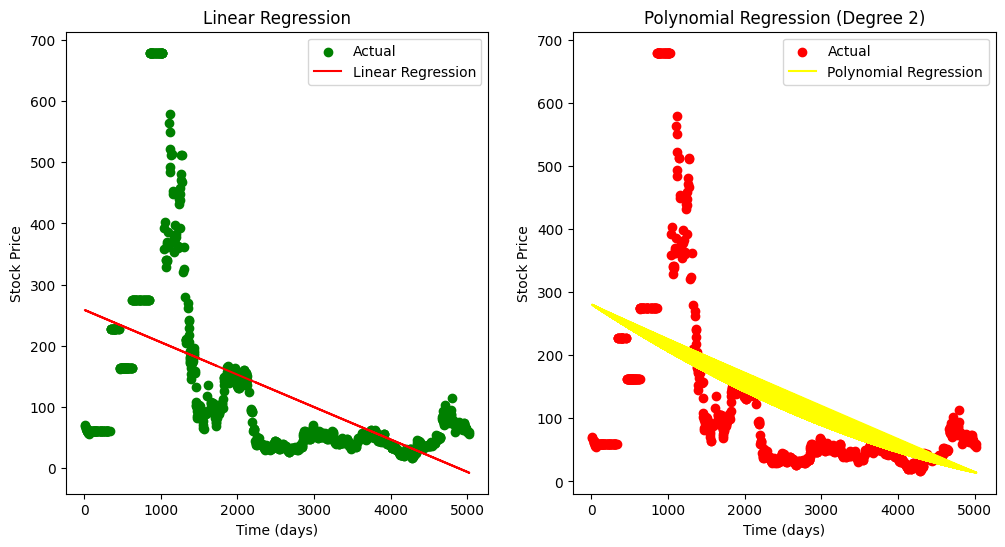

In [3]:
X_train, X_test, y_train, y_test = train_test_split(time, stock_prices, test_size=0.2, random_state=0)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(time)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, stock_prices, test_size=0.2, random_state=0)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
print(f"Polynomial Regression (Degree 2) MSE: {mse_poly}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('Time (days)')
plt.ylabel('Stock Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_test, y_pred_poly, color='yellow', label='Polynomial Regression')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Time (days)')
plt.ylabel('Stock Price')
plt.legend()

plt.show()